In [1]:
!pip install -q git+https://github.com/tensorflow/docs

In [2]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


In [4]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

Data Preprocessing

In [5]:
df = pd.read_excel("/content/ENB2012_data.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# List of Variables
* X1 = Relative Compactness
* X2 = Surface Area
* X3 = Wall Area
* X4 = Roof Area
* X5 = Overall Height
* X6 = Orientation
* X7 = Glazing Area
* X8 = Glazing Area Distribution
* y1 = Heating Load
* y2 = Cooling Load

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
df.shape

(768, 10)

In [8]:
# check to see if there is any missing values
null_v = df.isnull().sum()
print(null_v)

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


In [9]:
# changing categorical variables to dummy
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.X6=le.fit_transform(df.X6)
#df.homeOwnersInsurance=df.homeOwnersInsurance)

In [10]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,1.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,0.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,0.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,1.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,2.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,3.000000,0.400000,5.00000,43.100000,48.030000


In [11]:
df = df.rename(index=str, columns={"Y2": "Cooling Load","Y1": "Heating Load"})

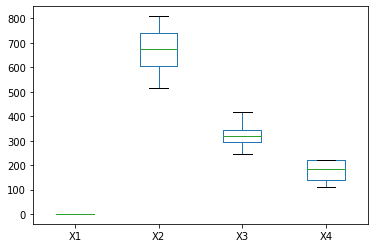

In [12]:
# Checking the distribution of the first four variables.
df_sub = df.iloc[:,:4]
df_sub.plot.box()

# Splitting the data

In [13]:
# Splitting the data into test and train data
train_df = df.sample(frac=0.8,random_state=0)
test_df = df.drop(train_df.index)

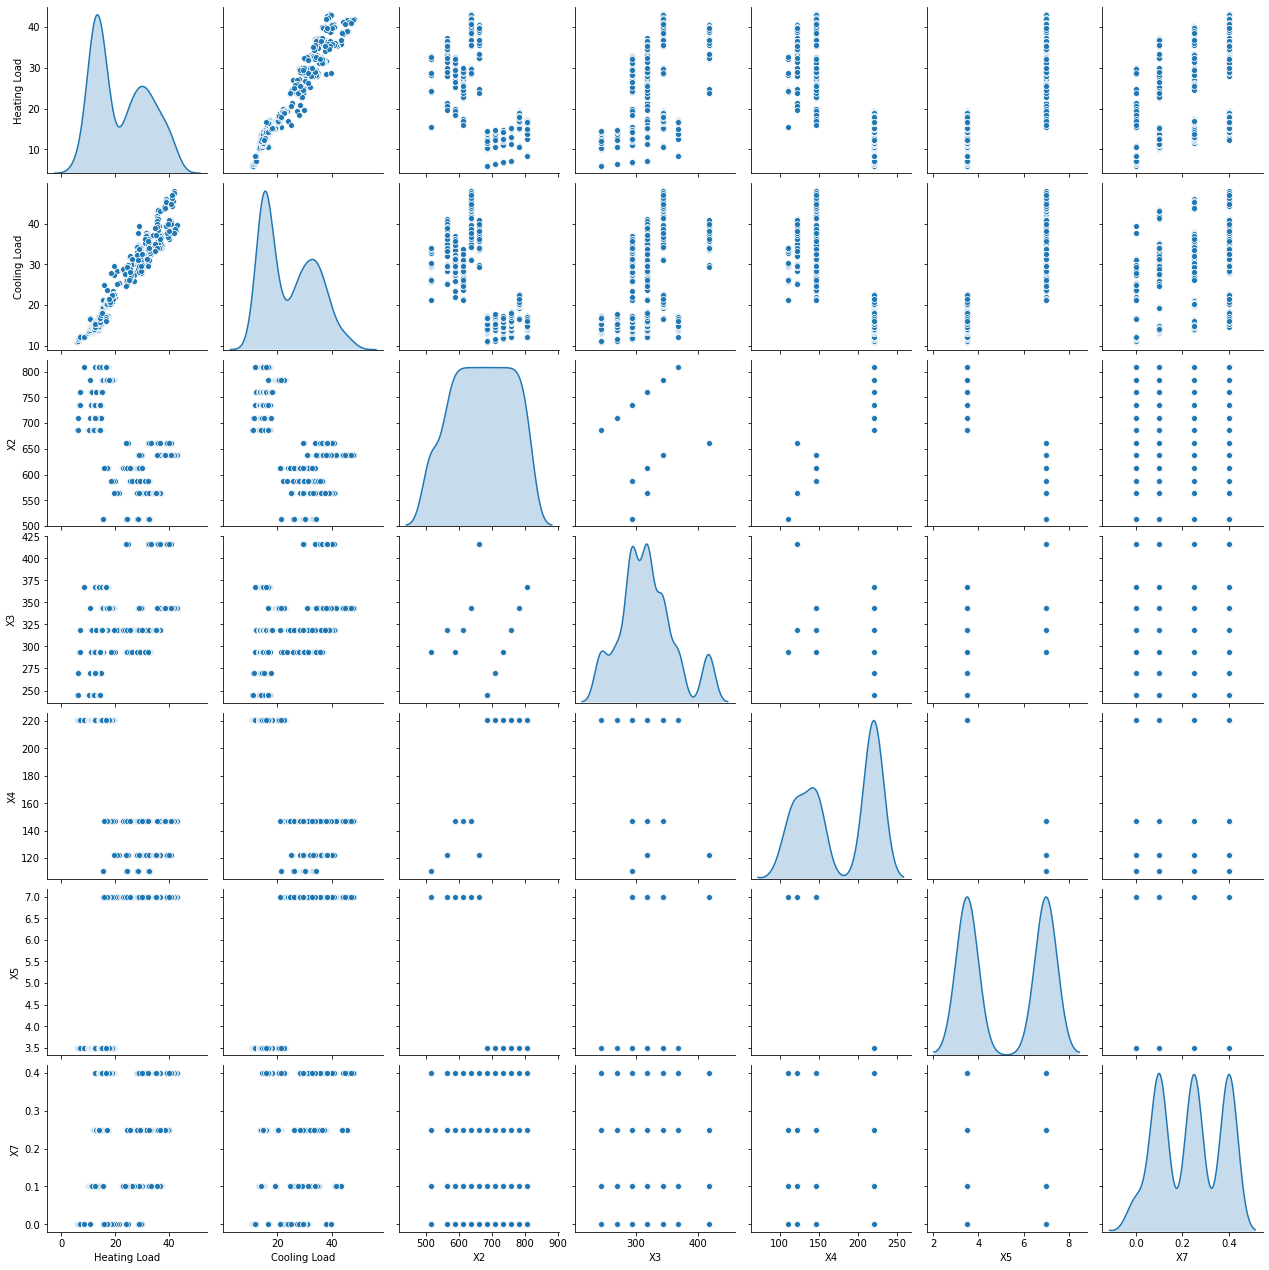

In [14]:
# Checking the relation off data
sns.pairplot(df[["Heating Load","Cooling Load","X2", "X3", "X4", "X5", "X7"]], diag_kind="kde")

In [15]:
train_stats = train_df.describe()
train_stats.pop("Heating Load")
train_stats.pop("Cooling Load")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
X1,614.0,0.767883,0.106370,0.62,0.69,0.76,0.86,0.98
X2,614.0,668.442997,88.301029,514.50,588.00,661.50,735.00,808.50
X3,614.0,319.098534,44.371316,245.00,294.00,318.50,343.00,416.50
X4,614.0,174.672231,45.265160,110.25,122.50,147.00,220.50,220.50
X5,614.0,5.324104,1.749856,3.50,3.50,7.00,7.00,7.00
X6,614.0,1.460912,1.106530,0.00,0.00,1.00,2.00,3.00
X7,614.0,0.235179,0.131872,0.00,0.10,0.25,0.40,0.40
X8,614.0,2.856678,1.538727,0.00,2.00,3.00,4.00,5.00


In [16]:
train_df

,X1,X2,X3,X4,X5,X6,X7,X8,Heating Load,Cooling Load
661,0.66,759.5,318.5,220.50,3.5,1,0.4,3,15.18,17.63
122,0.74,686.0,245.0,220.50,3.5,2,0.1,2,10.32,13.57
113,0.79,637.0,343.0,147.00,7.0,1,0.1,2,37.26,34.62
14,0.82,612.5,318.5,147.00,7.0,2,0.0,0,16.95,21.16
529,0.98,514.5,294.0,110.25,7.0,1,0.4,1,32.26,33.34
...,...,...,...,...,...,...,...,...,...,...
25,0.74,686.0,245.0,220.50,3.5,1,0.0,0,6.05,11.19
110,0.82,612.5,318.5,147.00,7.0,2,0.1,2,23.67,24.80
149,0.90,563.5,318.5,122.50,7.0,1,0.1,3,29.01,32.85
152,0.86,588.0,294.0,147.00,7.0,0,0.1,3,25.41,31.73


In [17]:
#Separate the target value, or "label", from the features. 
#This label is the value that you will train the model to predict.
train_labels = train_df.pop('Cooling Load')
test_labels = test_df.pop('Cooling Load')

In [18]:
test_labels

9      21.97
11     27.87
19     39.44
23     29.40
28     11.27
       ...  
746    16.94
753    15.87
754    16.54
759    18.06
763    21.40
Name: Cooling Load, Length: 154, dtype: float64

In [19]:
# All data needs to be scaled to a small range like 0 to 1 for the neural
# network to work well. Create scalers for the inputs and outputs.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
normed_train_data = sc.fit_transform(train_df)
normed_test_data = sc.fit_transform(test_df)

In [20]:
normed_train_data

array([[-1.01504751,  1.03205189, -0.01350021, ...,  1.25087833,
         0.0932195 , -0.74322075],
       [-0.2623432 ,  0.19899335, -1.67132633, ..., -1.025918  ,
        -0.55719839, -1.22639157],
       [ 0.208097  , -0.35637901,  0.53910849, ..., -1.025918  ,
        -0.55719839,  1.45192569],
       ...,
       [ 1.24306542, -1.18943755, -0.01350021, ..., -1.025918  ,
         0.0932195 ,  0.63172831],
       [ 0.86671327, -0.91175137, -0.56610892, ..., -1.025918  ,
         0.0932195 ,  0.273824  ],
       [ 1.99576973, -1.74480991, -0.56610892, ...,  1.25087833,
        -1.20761628,  0.95483637]])

# **Building the model**
Containing an input layer, one hidden layer, and an output layer.

*   64 nodes in the hidden layer
*   input shape is the number of nodes in the input layer, which is same number is independent variables
*   Output layer returs a single node, thus it's a continous value

In [21]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_df.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [22]:
model = build_model()

In [23]:
# showws how many trainable parameters are in the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [24]:
# keeping 20 percent of the data intact for validation
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])



Epoch: 0, loss:644.3022,  mae:23.5029,  mse:644.3022,  val_loss:565.7575,  val_mae:21.7225,  val_mse:565.7575,  
....................................................................................................
Epoch: 100, loss:1.8146,  mae:0.9723,  mse:1.8146,  val_loss:3.9234,  val_mae:1.4391,  val_mse:3.9234,  
....................................................................................................
Epoch: 200, loss:0.8328,  mae:0.6132,  mse:0.8328,  val_loss:2.2569,  val_mae:0.9524,  val_mse:2.2569,  
....................................................................................................
Epoch: 300, loss:0.5548,  mae:0.4997,  mse:0.5548,  val_loss:1.6593,  val_mae:0.8245,  val_mse:1.6593,  
....................................................................................................
Epoch: 400, loss:0.5010,  mae:0.5141,  mse:0.5010,  val_loss:1.2443,  val_mae:0.6837,  val_mse:1.2443,  
..............................................................

In [25]:
#Visualize the model's training progress using the stats stored in the history object.

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.228675,0.352356,0.228675,0.689865,0.586344,0.689865,995
996,0.207250,0.350863,0.207250,0.752634,0.599874,0.752634,996
997,0.208278,0.357806,0.208278,0.841628,0.708169,0.841628,997
998,0.202393,0.345261,0.202393,0.691848,0.574615,0.691848,998
999,0.236597,0.365540,0.236597,1.021060,0.743401,1.021060,999


In [26]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'Mean absolute Error [Cooling Load]')

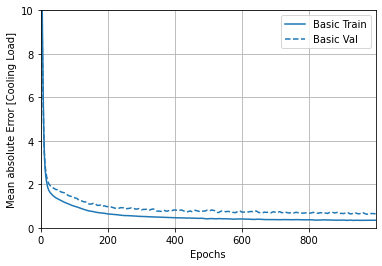

In [27]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('Mean absolute Error [Cooling Load]')


In [28]:
#update the model.fit call to automatically stop training when the validation score doesn't improve.
#We'll use an EarlyStopping callback that tests a training condition for every epoch.

In [29]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])



Epoch: 0, loss:664.1741,  mae:24.0481,  mse:664.1741,  val_loss:596.3165,  val_mae:22.6009,  val_mse:596.3165,  
..........................................................................................

Text(0, 0.5, 'Mean Absolute Error [Cooling Load]')

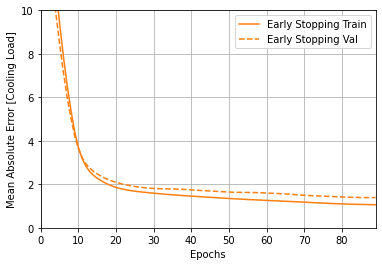

In [30]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('Mean Absolute Error [Cooling Load]')

In [31]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Cooling Load".format(mae))


5/5 - 0s - loss: 10.2045 - mae: 2.3213 - mse: 10.2045
Testing set Mean Abs Error:  2.32 Cooling Load


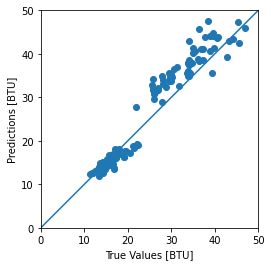

In [32]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [BTU]')
plt.ylabel('Predictions [BTU]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

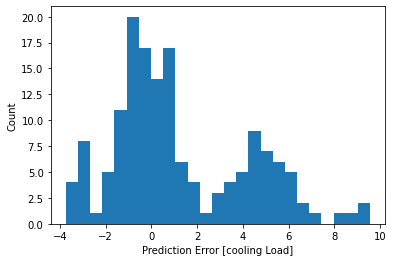

In [33]:
#Plotting the error Distribution
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [cooling Load]")
_ = plt.ylabel("Count")